<div style="text-align:left">

## Iris classification

#### Mt. SAC CISB 62 Midterm Project - Fall 2023

#### Russell Luna
    
</div>

<div style="text-align:left">

## Explanation of the Iris classification project:

#### The Iris classification dataset is a classic dataset that will help us predict the species of iris flowers based on their various measurements. It utilizes the load_iris function from sklearn.
#### The Iris dataset consists of 150 entries of iris flowers, with each sample having four features: sepal length, sepal width, petal length, and petal width. The flowers in the dataset belong to three different species: setosa, versicolor, and virginica. The goal of the project is to train a ANN model to accurately classify iris flowers into one of these three species based on their measurements.

</div>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras import backend as K  # 

from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import os

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.layers import Flatten, Dropout

Using TensorFlow backend


### Exploratory Data Analysis (EDA)

In [2]:
#load iris dataset
data = load_iris()

### print the keys

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### Display some information about the project

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

#Add a target column, and fill it with the target data
df['target'] = data.target
#Show the first five rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
#Create the variables X, y.
#For X, assign the values from the dataset, except the first and last columns.
#For Y, assign the class value (the value in the last column)

X= df.iloc[:, 1:-1].values
y= df.iloc[:, -1].values

In [8]:
#print X
X[0]

array([3.5, 1.4, 0.2])

In [9]:
#print the shape of X
X.shape

(150, 3)

In [10]:
#print y
y[0]

0

In [11]:
#print the shape of y
y.shape

(150,)

### split the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Split (X, y) into: X_train, X_test, y_train, y_test; use a test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#feature scaling, create a variable to use StandardScaler
sc = StandardScaler()

In [16]:
#use sc.fit_transform for both X_train and X_test
#hint: X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#display the shape of X_train
X_train.shape

(120, 3)

In [18]:
#display X_train
X_train[0]

array([ 1.20365799, -1.56253475, -1.31260282])

In [19]:
#display the shape of X_test
X_test.shape

(30, 3)

## Applying Deep Learning techniques

In [20]:
#print the value of X_test
print(X_test)

[[-0.58505976  0.55777524  0.02224751]
 [ 1.65083742 -1.16139502 -1.17911778]
 [-1.0322392   1.8185001   1.49058286]
 [-0.36147005  0.44316389  0.4227026 ]
 [-0.58505976  0.61508092  0.28921757]
 [ 0.75647855 -1.27600637 -1.04563275]
 [-0.36147005 -0.07258719  0.15573254]
 [ 0.08570939  0.78699794  1.49058286]
 [-1.92659808  0.44316389  0.4227026 ]
 [-0.80864948  0.09932984  0.02224751]
 [ 0.30929911  0.78699794  1.09012776]
 [-0.13788033 -1.33331205 -1.44608785]
 [ 0.98006827 -1.39061772 -1.31260282]
 [ 0.08570939 -1.27600637 -1.44608785]
 [ 1.65083742 -1.27600637 -1.17911778]
 [ 0.53288883  0.55777524  0.55618763]
 [-0.13788033  1.18813767  1.35709783]
 [-1.25582892  0.09932984 -0.11123753]
 [-0.58505976  0.44316389  0.15573254]
 [-0.58505976  1.07352632  1.35709783]
 [ 0.30929911 -1.2187007  -1.31260282]
 [-0.13788033  0.67238659  0.8231577 ]
 [ 0.75647855 -1.2187007  -1.04563275]
 [-0.58505976  1.07352632  1.22361279]
 [ 1.65083742  1.53197172  1.09012776]
 [-0.13788033  0.84430362

In [21]:
#initializing the ANN
#use a sequential model
#add layer
#second layer
#compile model

#Add a sequential model
model = Sequential()

#Adding the first layer 
model.add(Dense(16, activation='relu', input_dim=3,))

#Adding the output layers
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#Compiling the ANN
model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=['accuracy'])

In [22]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#use model.fit to train the ANN
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 1s 24ms/step - loss: -0.0963 - accuracy: 0.6167 - val_loss: -1.3324 - val_accuracy: 0.6333
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: -2.7496 - accuracy: 0.6667 - val_loss: -6.6111 - val_accuracy: 0.6333
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: -11.3286 - accuracy: 0.6667 - val_loss: -22.8881 - val_accuracy: 0.6333
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: -34.5832 - accuracy: 0.6750 - val_loss: -64.4902 - val_accuracy: 0.6333
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: -83.7891 - accuracy: 0.6750 - val_loss: -146.6148 - val_accuracy: 0.6333
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: -174.0801 - accuracy: 0.6750 - val_loss: -279.6137 - val_accuracy: 0.6333
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: -309.4496 - accuracy: 0.6750 - val_loss: -468.4241 - val_

24/24 [==============================] - 0s 3ms/step - loss: -221113.2969 - accuracy: 0.6750 - val_loss: -272264.5312 - val_accuracy: 0.6333
Epoch 56/100
24/24 [==============================] - 0s 3ms/step - loss: -232409.0938 - accuracy: 0.6750 - val_loss: -287066.3438 - val_accuracy: 0.6333
Epoch 57/100
24/24 [==============================] - 0s 5ms/step - loss: -244858.4062 - accuracy: 0.6750 - val_loss: -301305.7188 - val_accuracy: 0.6333
Epoch 58/100
24/24 [==============================] - 0s 3ms/step - loss: -256854.1094 - accuracy: 0.6750 - val_loss: -317090.9688 - val_accuracy: 0.6333
Epoch 59/100
24/24 [==============================] - 0s 3ms/step - loss: -270040.5625 - accuracy: 0.6750 - val_loss: -331807.9375 - val_accuracy: 0.6333
Epoch 60/100
24/24 [==============================] - 0s 3ms/step - loss: -283062.9375 - accuracy: 0.6750 - val_loss: -347365.5000 - val_accuracy: 0.6333
Epoch 61/100
24/24 [==============================] - 0s 3ms/step - loss: -296143.8750 - 

### Visualize the Model Loss

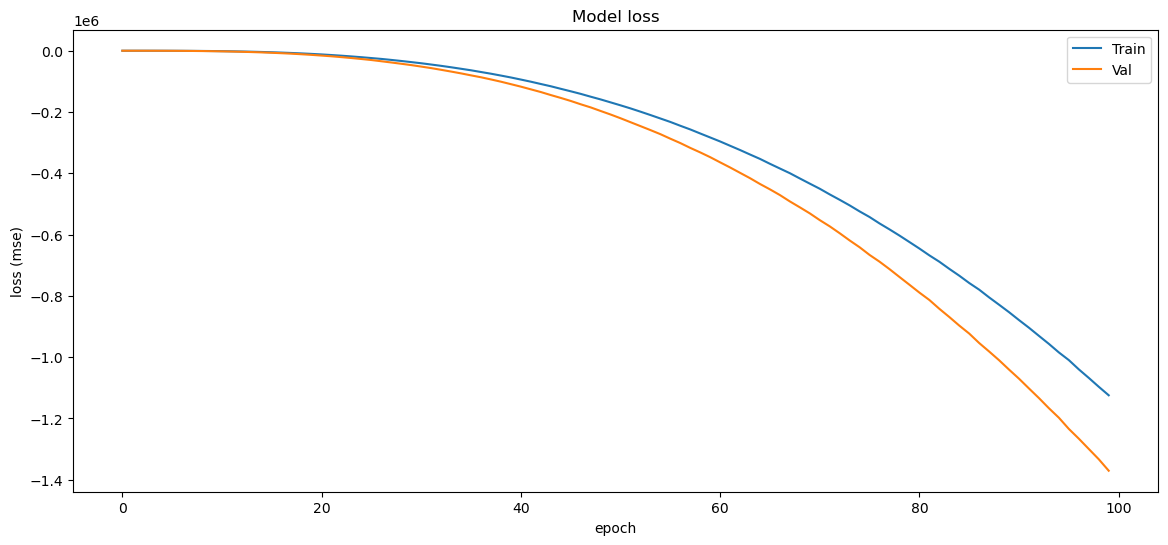

In [24]:
#plot the model loss vs epocs
plt.figure(figsize=(14,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

### Print accuracy

In [25]:
#your code goes here
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6333333253860474


In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
#display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
#Let's check how much we are off on average 
#Enter three lines of code here:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
y_pred[0:5]

1/1 [==============================] - 0s 104ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [28]:
#print mae value
mae

0.36666666666666664

In [29]:
#print the real value of sample 19
y_pred[19]

array([1.], dtype=float32)

In [30]:
#use model.predict and numpy reshape, print the predicted value of the same # above
model.predict(np.reshape(X_test[19], [1,-1]))

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

#### Confusion Matrix

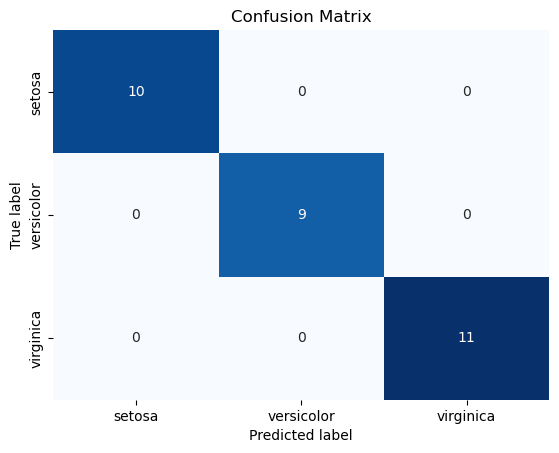

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
iris = load_iris()
X = iris.data
y = iris.target

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#Visualize the confusion matrix
class_names = iris.target_names
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

### Tuning Hyperparameters

In [32]:
#Create a folder path for Hyperparameter tuning
folder_path = "my_dir/intro_to_kt/"

In [33]:
import os
import shutil

#shutil module is part of the Python standard library and provides a 
#collection of utility functions for working with files and directories. 

folder_path = "my_dir/"

#Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    #Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/' does not exist.


In [34]:
#Delete the ".tensorboard-info" directory 
folder_path = "C:/Users/User/AppData/Local/Temp/.tensorboard-info/"

#Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    #Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'C:/Users/User/AppData/Local/Temp/.tensorboard-info/' does not exist.


<b>Hyperparameters Tuning </b>: 

The number of neurons in the dense layer  
The learning rate is searched for the values 0.01, 0.001 or 0.0001.

In [35]:
#Create a model-building function
def model_builder(hp):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=16, max_value=32, step=4),
                         activation='relu'))
    model.add(Dense(units=hp.Int('dense_units_2', min_value=8, max_value=32, step=4),
                         activation='relu'))
    model.add(Dense(101, activation='softmax'))
    model.compile( optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [36]:
tuner = RandomSearch( model_builder, objective='val_accuracy', max_trials=10,
    directory='my_dir', project_name='intro_to_kt')

In [37]:
#Search the hyperparameters to see which combination provides the best model result
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Trial 10 Complete [00h 00m 07s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 20s


In [38]:
#Retrieve the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [39]:
#Display the best hyperparameters
print(f"The hyperparameter search is complete.")
print(f"The optimal number of neurons is {best_hps.get('dense_units_1')}.")
print(f"The optimal number of neurons is {best_hps.get('dense_units_2')}.")

The hyperparameter search is complete.
The optimal number of neurons is 32.
The optimal number of neurons is 32.


#### Build the final model using the optimal hyperparameters

In [40]:
#Create the final model with the optimal hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [41]:
#Fit model
history = final_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 93ms/step - loss: 4.6729 - accuracy: 0.0000e+00 - val_loss: 4.4404 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 4.3952 - accuracy: 0.0000e+00 - val_loss: 4.1716 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 4.1346 - accuracy: 0.0000e+00 - val_loss: 3.9174 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 3.8897 - accuracy: 0.1250 - val_loss: 3.6698 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 3.6459 - accuracy: 0.3333 - val_loss: 3.4193 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 3.4006 - accuracy: 0.3333 - val_loss: 3.1651 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 3.1509 - accuracy: 0.3333 - val_loss: 2.9023 - val_accuracy: 0.3

Epoch 59/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3264 - accuracy: 0.9750 - val_loss: 0.3201 - val_accuracy: 0.9667
Epoch 60/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3193 - accuracy: 0.9750 - val_loss: 0.3143 - val_accuracy: 0.9667
Epoch 61/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3152 - accuracy: 0.9750 - val_loss: 0.3081 - val_accuracy: 0.9667
Epoch 62/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3073 - accuracy: 0.9750 - val_loss: 0.3041 - val_accuracy: 0.9667
Epoch 63/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3013 - accuracy: 0.9750 - val_loss: 0.2993 - val_accuracy: 0.9667
Epoch 64/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2943 - accuracy: 0.9750 - val_loss: 0.2915 - val_accuracy: 0.9667
Epoch 65/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2884 - accuracy: 0.9750 - val_loss: 0.2859 - val_accuracy: 0.9667
Epoch 66/100


In [42]:
#Find the best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('The best epoch: %d' % (best_epoch,))

The best epoch: 70


In [43]:
#Evaluate the model
eval_result = final_model.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

4/4 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9833
[test loss, test accuracy]: [0.1427837461233139, 0.9833333492279053]


### Plot Accuracy and Loss 

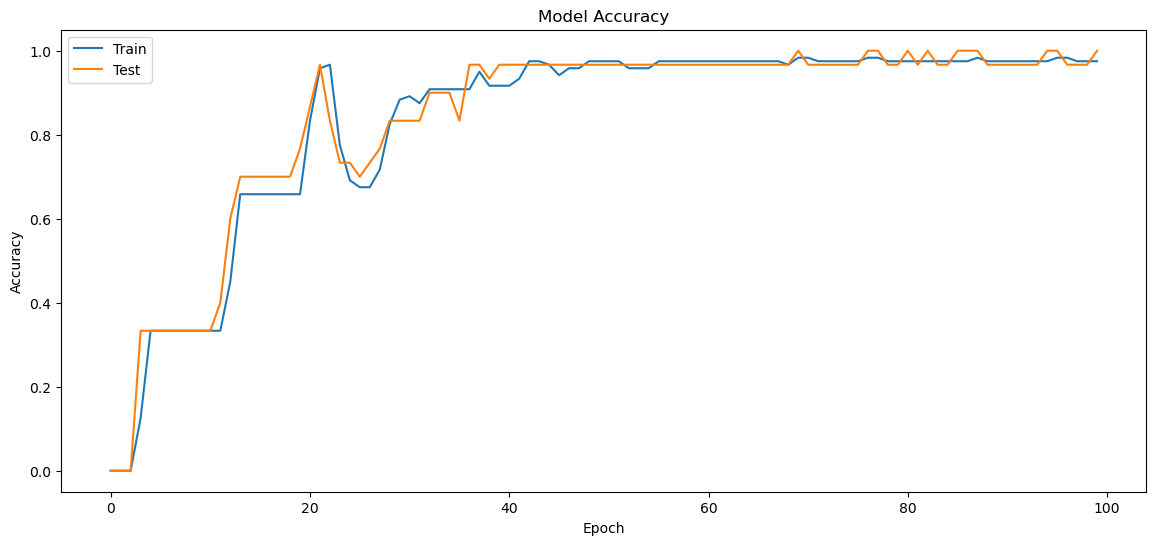

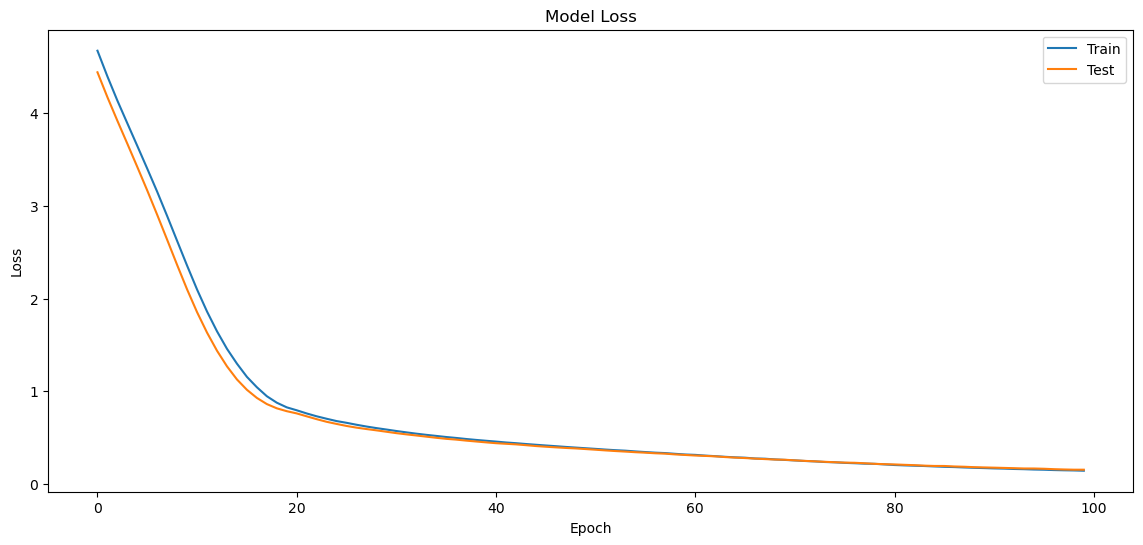

In [44]:
#Plot the accuracy
plt.figure(figsize=(14,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot the loss
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Conclusion

<div style="text-align:left">

Initially, the model performed relatively poorly, with only an overall accuracy of about 63.33%.

Via tuning of various hyperparameters, it was determined that:

- The best optimizer was Adam.
- The optimal number of neurons is 32 for both the first and second layers.
- The ANN initially suffered from underfitting but improved after tuning the hyperparameters with keras.

After tuning and changing the loss function to SparseCategoricalCrossentropy, the test accuracy went from roughly 63.33% to a whopping 98.33%.
Though there may also be overfitting at play, looking at the accuracy plot can contribute to this improved accuracy despite the low loss (14.28%).
Using an ANN to predict Iris species is a great idea, as ANNs can give very precise results.
However, as ANNs can be prone to overfitting, choosing the best hyperparameters helps to greatly mitigate this issue.

</div>